#Indonesia AI Batch 17
#ML Assignment 2

## Import

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Loading Data

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
path = '/content/drive/MyDrive/learn/Ind AI ML/'

In [12]:
column = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(path+'housing.csv', sep=r"\s+", header=None, names=column)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
df.duplicated().any()

False

In [18]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

# Visualisasi

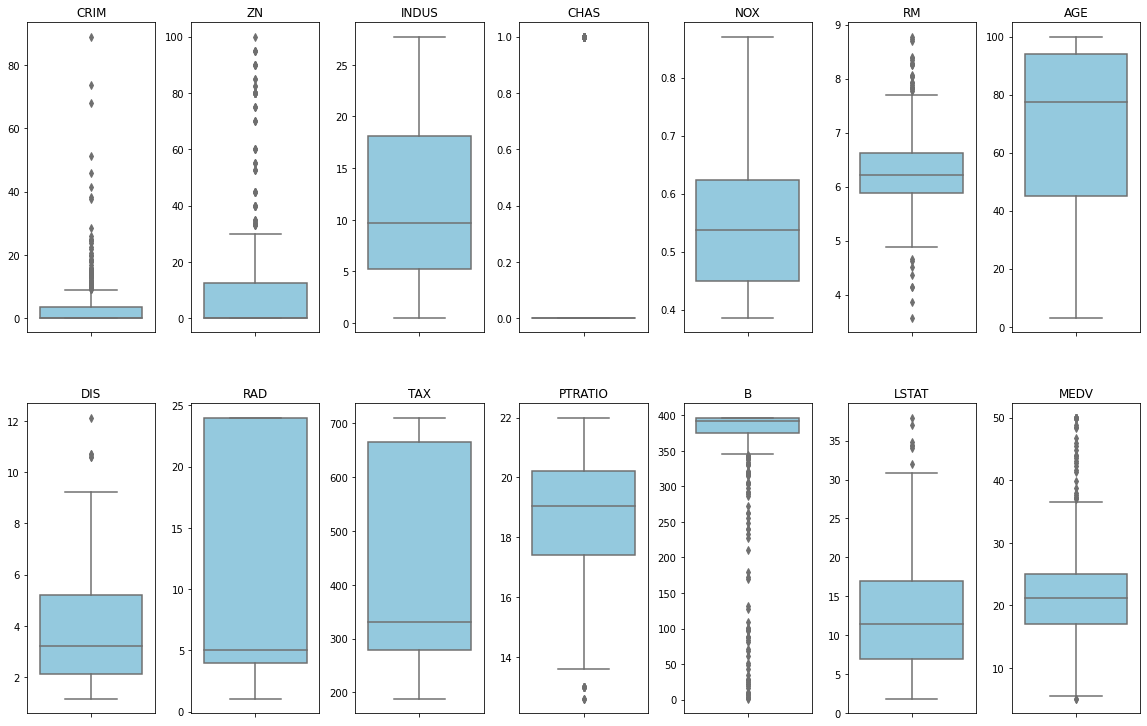

In [22]:
fig, ax = plt.subplots(2, 7, figsize=(16, 10))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

for index, name in enumerate(df.columns):
    plot = sns.boxplot(y=df[name], 
                       ax=ax[index//7, index%7], color='skyblue')
    plot.set(title=name)
    plot.set(ylabel=None)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

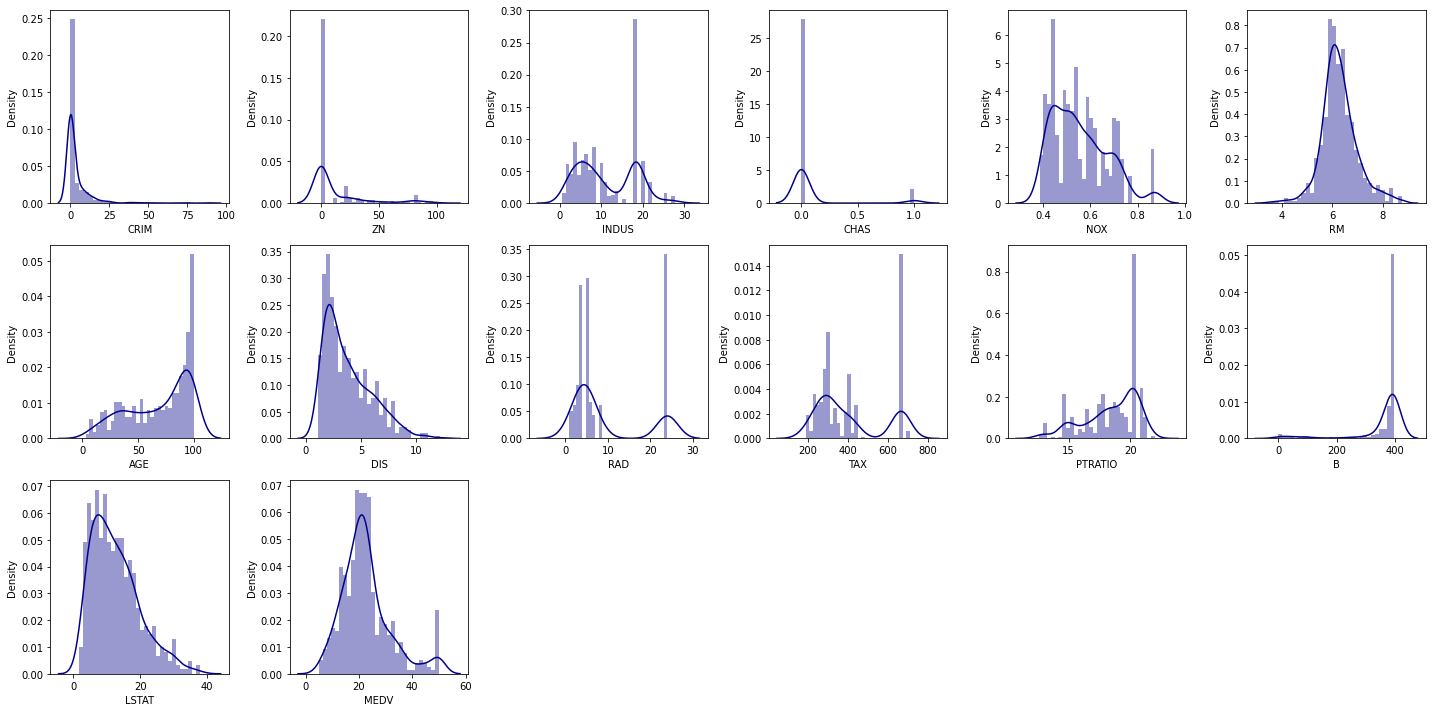

In [25]:
plt.figure(figsize=(20, 10))
for i in range(0, len(column)):
  plt.subplot(3, 6, i+1)
  sns.distplot(df[column[i]],color='darkblue', bins=30)
  plt.tight_layout()

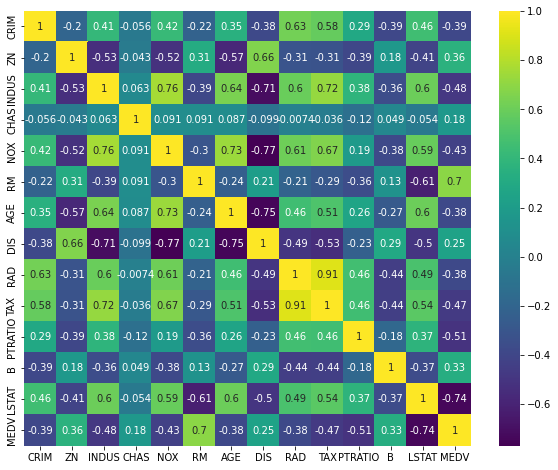

In [26]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), cmap='viridis', annot=True)

plt.show()

# Data Processing

In [31]:
mm = MinMaxScaler()


NameError: ignored

### Modeling

In [33]:
mms = MinMaxScaler()

df['ZN'] = mms.fit_transform(df[['ZN']])
df['INDUS'] = mms.fit_transform(df[['INDUS']])
df['RM'] = mms.fit_transform(df[['RM']])
df['AGE'] = mms.fit_transform(df[['AGE']])
df['DIS'] = mms.fit_transform(df[['DIS']])
df['RAD'] = mms.fit_transform(df[['RAD']])
df['TAX'] = mms.fit_transform(df[['TAX']])
df['PTRATIO'] = mms.fit_transform(df[['PTRATIO']])
df['B'] = mms.fit_transform(df[['B']])
df['LSTAT'] = mms.fit_transform(df[['LSTAT']])
df['MEDV'] = mms.fit_transform(df[['MEDV']])

In [34]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [35]:
display(X.head())
display(y.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,0.18,0.067815,0,0.538,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.02731,0.00,0.242302,0,0.469,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.02729,0.00,0.242302,0,0.469,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.03237,0.00,0.063050,0,0.458,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.06905,0.00,0.063050,0,0.458,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


0    0.422222
1    0.368889
2    0.660000
3    0.631111
4    0.693333
Name: MEDV, dtype: float64

In [36]:
df.shape

(506, 14)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


##Linear Regression

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Performa Training

In [39]:
y_predict = model.predict(X_train)
mse = mean_squared_error(y_train, y_predict)
r2 = r2_score(y_train, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score (akurasi): {r2}')

Mean Squared Error: 0.009329089507085572
R2 Score (akurasi): 0.7541316570494503


#### Performa data testing

In [40]:
y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score (akurasi): {r2}')

Mean Squared Error: 0.018100449379756446
R2 Score (akurasi): 0.6756424926963636
